In [1]:
import torch
from torch import nn
import random

## Multi-Head Self Attention Implementation

In [62]:


class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_dim, num_heads):
        super().__init__()
        self.hidden_dim = hidden_dim # D
        self.num_heads = num_heads # h
    
        # for each head, we create h linear layers for query, key, and value 
        # store h linear layers for queries. Each linear layer applies a [D, D] matrix.
        # This matches the [D, D] matrix W_q shown in SDA description.
        self.q_weights = [nn.Linear(hidden_dim, hidden_dim) for _ in range(self.num_heads)] 
        self.k_weights = [nn.Linear(hidden_dim, hidden_dim) for _ in range(self.num_heads)]
        self.v_weights = [nn.Linear(hidden_dim, hidden_dim) for _ in range(self.num_heads)]
        
        self.softmax = nn.Softmax(dim = -1) #Don't understand this line
        self.linear = nn.Linear(num_heads*hidden_dim, hidden_dim) # transforms input of shape num_heads*hidden_dim to output of shape hidden_dim

    # B,N,D = X.shape
    def forward(self, X):
        for x in X:
            x_result = [] # What will be input here?
            for head in range(self.num_heads):
                #Applies affine transformation to input matrix x
                q = self.q_weights[head](x)
                k = self.k_weights[head](x)
                v = self.v_weights[head](x)
                # Calculate the value of the head. This should have dim [N+1, D] if everything worked out right.
                h = self.softmax(q @ k.T / self.hidden_dim ** 0.5) @ v
                x_result.append(h)
                
        

## torch.cat() Function

In [ ]:
a = torch.rand(3,2)
print("tensor a:\n", a)


# Concatenate along rows
b_row = torch.cat((a, a), 1) 
print("Concatenate along rows:\n", b_row)

# Concatenate along columns
b_col= torch.cat((a, a), 0) 
print("Concatenate along columns:\n", b_col)

c = torch.rand(1, 4)

print("tensor c:\n",c)

d = torch.cat([c, b_row], dim = 0)
print("(tensor c) cat (tensor b_row):\n",d)


tall = torch.rand(len(b_col), 1)
print("tall tensor:\n", tall)

tall_cat = torch.cat([tall, b_col], dim = 1)
print("(tall tensor) cat (b_col):\n", tall_cat)


```text
tensor a:
 tensor([[0.7042, 0.9584],
        [0.4484, 0.1449],
        [0.9184, 0.3075]])
Concatenate along rows:
 tensor([[0.7042, 0.9584, 0.7042, 0.9584],
        [0.4484, 0.1449, 0.4484, 0.1449],
        [0.9184, 0.3075, 0.9184, 0.3075]])
Concatenate along columns:
 tensor([[0.7042, 0.9584],
        [0.4484, 0.1449],
        [0.9184, 0.3075],
        [0.7042, 0.9584],
        [0.4484, 0.1449],
        [0.9184, 0.3075]])
tensor c:
 tensor([[0.7249, 0.4882, 0.2836, 0.3267]])
(tensor c) cat (tensor b_row):
 tensor([[0.7249, 0.4882, 0.2836, 0.3267],
        [0.7042, 0.9584, 0.7042, 0.9584],
        [0.4484, 0.1449, 0.4484, 0.1449],
        [0.9184, 0.3075, 0.9184, 0.3075]])
tall tensor:
 tensor([[0.5927],
        [0.1613],
        [0.4558],
        [0.3440],
        [0.0862],
        [0.5543]])
(tall tensor) cat (b_col):
 tensor([[0.5927, 0.7042, 0.9584],
        [0.1613, 0.4484, 0.1449],
        [0.4558, 0.9184, 0.3075],
        [0.3440, 0.7042, 0.9584],
        [0.0862, 0.4484, 0.1449],
        [0.5543, 0.9184, 0.3075]])
```

## More on .cat() Function

In [3]:
thick = torch.rand(3, 4 ,5)
print(thick)

tensor([[[0.5598, 0.8820, 0.6322, 0.4043, 0.5758],
         [0.6883, 0.6264, 0.7976, 0.4344, 0.1991],
         [0.0574, 0.5711, 0.8483, 0.6825, 0.0687],
         [0.1407, 0.1226, 0.0252, 0.4467, 0.4776]],

        [[0.9443, 0.0352, 0.7582, 0.1206, 0.9927],
         [0.9311, 0.1511, 0.3955, 0.7808, 0.0398],
         [0.7245, 0.3204, 0.4545, 0.1169, 0.0161],
         [0.5863, 0.6014, 0.0372, 0.9867, 0.5859]],

        [[0.1750, 0.7543, 0.2268, 0.4537, 0.8449],
         [0.3239, 0.6434, 0.6153, 0.8646, 0.1783],
         [0.6055, 0.8335, 0.3202, 0.8409, 0.4690],
         [0.5676, 0.9986, 0.2055, 0.3016, 0.9723]]])


```text

tensor([[[0.2984, 0.5280, 0.3359, 0.9617, 0.4389],
         [0.9986, 0.0118, 0.5793, 0.1739, 0.1705],
         [0.7460, 0.1552, 0.4384, 0.1746, 0.4445],
         [0.4658, 0.8685, 0.1178, 0.2616, 0.7458]],

        [[0.0032, 0.4205, 0.8507, 0.6310, 0.8632],
         [0.7349, 0.3303, 0.3599, 0.6573, 0.9453],
         [0.9328, 0.7493, 0.0539, 0.7898, 0.4870],
         [0.4433, 0.6733, 0.5359, 0.5936, 0.3030]],

        [[0.1091, 0.9556, 0.8774, 0.4286, 0.7023],
         [0.8716, 0.5008, 0.1876, 0.4087, 0.2817],
         [0.7080, 0.9299, 0.8436, 0.1520, 0.0924],
         [0.8787, 0.3859, 0.8812, 0.5642, 0.6120]]])
```

In [22]:
double_thick = torch.cat([thick, thick], dim =1)
print(double_thick)

tensor([[[0.5598, 0.8820, 0.6322, 0.4043, 0.5758],
         [0.6883, 0.6264, 0.7976, 0.4344, 0.1991],
         [0.0574, 0.5711, 0.8483, 0.6825, 0.0687],
         [0.1407, 0.1226, 0.0252, 0.4467, 0.4776],
         [0.5598, 0.8820, 0.6322, 0.4043, 0.5758],
         [0.6883, 0.6264, 0.7976, 0.4344, 0.1991],
         [0.0574, 0.5711, 0.8483, 0.6825, 0.0687],
         [0.1407, 0.1226, 0.0252, 0.4467, 0.4776]],

        [[0.9443, 0.0352, 0.7582, 0.1206, 0.9927],
         [0.9311, 0.1511, 0.3955, 0.7808, 0.0398],
         [0.7245, 0.3204, 0.4545, 0.1169, 0.0161],
         [0.5863, 0.6014, 0.0372, 0.9867, 0.5859],
         [0.9443, 0.0352, 0.7582, 0.1206, 0.9927],
         [0.9311, 0.1511, 0.3955, 0.7808, 0.0398],
         [0.7245, 0.3204, 0.4545, 0.1169, 0.0161],
         [0.5863, 0.6014, 0.0372, 0.9867, 0.5859]],

        [[0.1750, 0.7543, 0.2268, 0.4537, 0.8449],
         [0.3239, 0.6434, 0.6153, 0.8646, 0.1783],
         [0.6055, 0.8335, 0.3202, 0.8409, 0.4690],
         [0.5676, 0.9986, 0

```text
tensor([[[0.2984, 0.5280, 0.3359, 0.9617, 0.4389],
         [0.9986, 0.0118, 0.5793, 0.1739, 0.1705],
         [0.7460, 0.1552, 0.4384, 0.1746, 0.4445],
         [0.4658, 0.8685, 0.1178, 0.2616, 0.7458],
         [0.2984, 0.5280, 0.3359, 0.9617, 0.4389],
         [0.9986, 0.0118, 0.5793, 0.1739, 0.1705],
         [0.7460, 0.1552, 0.4384, 0.1746, 0.4445],
         [0.4658, 0.8685, 0.1178, 0.2616, 0.7458]],

        [[0.0032, 0.4205, 0.8507, 0.6310, 0.8632],
         [0.7349, 0.3303, 0.3599, 0.6573, 0.9453],
         [0.9328, 0.7493, 0.0539, 0.7898, 0.4870],
         [0.4433, 0.6733, 0.5359, 0.5936, 0.3030],
         [0.0032, 0.4205, 0.8507, 0.6310, 0.8632],
         [0.7349, 0.3303, 0.3599, 0.6573, 0.9453],
         [0.9328, 0.7493, 0.0539, 0.7898, 0.4870],
         [0.4433, 0.6733, 0.5359, 0.5936, 0.3030]],

        [[0.1091, 0.9556, 0.8774, 0.4286, 0.7023],
         [0.8716, 0.5008, 0.1876, 0.4087, 0.2817],
         [0.7080, 0.9299, 0.8436, 0.1520, 0.0924],
         [0.8787, 0.3859, 0.8812, 0.5642, 0.6120],
         [0.1091, 0.9556, 0.8774, 0.4286, 0.7023],
         [0.8716, 0.5008, 0.1876, 0.4087, 0.2817],
         [0.7080, 0.9299, 0.8436, 0.1520, 0.0924],
         [0.8787, 0.3859, 0.8812, 0.5642, 0.6120]]])
```

## torch.reshape() Function

In [25]:
import torch

# Initialize tensor a
a = torch.arange(4.)
print("Tensor a:\n", a)
print("Shape of a:\n", a.shape)

# Reshape tensor a
a = torch.reshape(a, (2, 2))
print("Tensor a reshaped:\n", a)
print("Shape of a reshaped:\n", a.shape)

print("#---------------------#")

# Initialize tensor b
b = torch.tensor([[0, 1], [2,3]])
print("Tensor b:\n", b)
print("Shape of b:\n", b.shape)

# Reshape tensor b (only one dim may be -1)
b = torch.reshape(b, (-1,))
print("Tensor b reshaped:\n", b)
print("Shape of b reshaped:\n", b.shape)

print("#---------------------#")

# Initialize a tensor with vals 0 to 5
long_torch = torch.arange(6.)
print("long_torch:\n", long_torch)
# Concatenate two copies, end to end
double_long_torch = torch.cat((long_torch, long_torch), 0)
print("double_long_torch:\n", double_long_torch)
# Reshape into two (3,2) torch tensors.
reshaped_double = double_long_torch.reshape(2, 3, 2)
print("reshaped_double:\n", reshaped_double)

Tensor a:
 tensor([0., 1., 2., 3.])
Shape of a:
 torch.Size([4])
Tensor a reshaped:
 tensor([[0., 1.],
        [2., 3.]])
Shape of a reshaped:
 torch.Size([2, 2])
#---------------------#
Tensor b:
 tensor([[0, 1],
        [2, 3]])
Shape of b:
 torch.Size([2, 2])
Tensor b reshaped:
 tensor([0, 1, 2, 3])
Shape of b reshaped:
 torch.Size([4])
#---------------------#
long_torch:
 tensor([0., 1., 2., 3., 4., 5.])
double_long_torch:
 tensor([0., 1., 2., 3., 4., 5., 0., 1., 2., 3., 4., 5.])
reshaped_double:
 tensor([[[0., 1.],
         [2., 3.],
         [4., 5.]],

        [[0., 1.],
         [2., 3.],
         [4., 5.]]])


```text
Tensor a:
 tensor([0., 1., 2., 3.])
Shape of a:
 torch.Size([4])
Tensor a reshaped:
 tensor([[0., 1.],
        [2., 3.]])
Shape of a reshaped:
 torch.Size([2, 2])
#---------------------#
Tensor b:
 tensor([[0, 1],
        [2, 3]])
Shape of b:
 torch.Size([2, 2])
Tensor b reshaped:
 tensor([0, 1, 2, 3])
Shape of b reshaped:
 torch.Size([4])

 long_torch:
 tensor([0., 1., 2., 3., 4., 5.])
double_long_torch:
 tensor([0., 1., 2., 3., 4., 5., 0., 1., 2., 3., 4., 5.])
reshaped_double:
 tensor([[[0., 1.],
         [2., 3.],
         [4., 5.]],

        [[0., 1.],
         [2., 3.],
         [4., 5.]]])
 ```

## .repeat() Function


In [ ]:
import torch
# Initialize tensor a
a = torch.rand(1, 4)
print("Tensor a:\n", a)
print("Shape of a:\n", a.shape)

# Apply repeat() function
a = a.repeat(5, 1, 1) 
print("Tensor a repeated:\n",a)

```text
Tensor a:
 tensor([[0.7483, 0.6398, 0.8531, 0.3351]])
Shape of a:
 torch.Size([1, 4])
Tensor a repeated:
 tensor([[[0.7483, 0.6398, 0.8531, 0.3351]],

        [[0.7483, 0.6398, 0.8531, 0.3351]],

        [[0.7483, 0.6398, 0.8531, 0.3351]],

        [[0.7483, 0.6398, 0.8531, 0.3351]],

        [[0.7483, 0.6398, 0.8531, 0.3351]]])

Five copies: each has 1 row and 4 cols
```

In [63]:
class VisionTransformer(nn.Module):
    def __init__(self, img_shape, patch_dims, hidden_dim, num_heads, out_dim, num_encoder_blocks=6):
        super().__init__()
        
        # img_shape is likely C, H, W since image tensors are typically N, C, H, W in Pytorch.
        self.img_shape = img_shape    
        # Length of flattened patches
        self.patch_len = img_shape[0]*patch_dims[0]*patch_dims[1] 
        self.num_patches = (img_shape[1] // patch_dims[0]) * (img_shape[2] // patch_dims[1])
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.out_dim = out_dim
        self.num_encoder_blocks = num_encoder_blocks

        # Linear Patching:
        self.linear_patching = nn.Linear(self.patch_len, self.hidden_dim)

        # Class Embedding: nn.Parameter ensures that the col vector of len self.hidden_dim is learned by the model
        self.class_embedding = nn.Parameter(torch.rand(1, self.hidden_dim)) 

        # Positional Embedding
        self.positional_embedding = nn.Parameter(torch.rand(1+self.num_patches, self.hidden_dim)) # positional encoding is a matrix in R^{[N+1, D]} just like input.

        # Transformer #Question is where the inputs here come from. The Architecture we already understand.
        self.transformer_1 = nn.Sequential(
            nn.LayerNorm(self.hidden_dim),
            MultiHeadSelfAttention(self.hidden_dim, self.num_heads)
        )

        self.transformer_2 = nn.Sequential(
            nn.LayerNorm(1+ self.num_patches, self.hidden_dim),
            nn.Linear(self.hidden_dim, self.hidden_dim)
        )

        # MLP head
        self.mlp_head = nn.Sequential(
            nn.Linear(self.hidden_dim, self.out_dim),
            nn.Tanh()
        )

# Up to here, everything should be inside the constructor, def __init__()

def forward(self, X):
        B, C, H, W = X.shape 
        patches = X.reshape(B, self.num_patches, self.patch_len)
        # performs THE SAME linear transformation on B * self.num_patches to turn vectors of len self.patch_len into vectors of self.hidden_dim.
        # They weights are "shared"
        E = self.linear_patching(patches)
        # B copies: each as (1) row and (self.hidden_dim) cols
        cls_embedding = self.cls_embedding.repeat(B, 1, 1)
        E = torch.cat([cls_embedding, E], dim=1)
        Epos = self.pos_embedding.repeat(B, 1, 1)
        Z = E + Epos
        for _ in range(self.num_encoder_blocks):
            res1 = self.transformer_1(Z)
            Z = self.transformer_2(res1 + Z)
        C = self.mlp_head(Z[:, 0])
        return C

In [66]:
with torch.no_grad():
    X = torch.randn(16, 3, 224, 224)
    B, C, H, W = X.shape
    model = VisionTransformer((C, H, W), (16, 16), 768, 12, 10)

    # Patchify
    patch_len = C * 16 * 16
    num_patches = (H // 16) * (W // 16)
    patches = X.reshape(B, num_patches, patch_len)

    # Embedding
    E = model.linear_patching(patches)

    # CLS token
    cls_embedding = model.class_embedding.repeat(B, 1, 1)
    E = torch.cat([cls_embedding, E], dim=1)

    # Positional embedding
    pos_embedding = model.positional_embedding.unsqueeze(0).repeat(B, 1, 1)
    Z = E + pos_embedding

    # for _ in range(model.num_encoder_blocks):
    #     res1 = model.transformer_1(Z)
    #     Z = model.transformer_2(res1 + Z)

    # out = model.mlp_head(Z[:, 0])
    # print(out.shape)


torch.Size([16, 196, 768])


## Linear Transformations in Pytorch

In [ ]:
#Pass from a 4 dim input -> 3 dim output
x = torch.randn(4)
print(f'Shape of x: {x.shape}')
print(f'Input x: {x}')


#Affine transformation is carried out by linear layer
linear = nn.Linear(4, 3)
print(f'linear.weight.shape: {linear.weight.shape}')
print(f'linear.weight.T.shape: {linear.weight.T.shape}')

print(f'linear.weight: {linear.weight}')

#y stores the result of the affine transformation
y = linear(x)
print(f'Shape of y: {y.shape}')
print(f'y: {y}') 



## Example (and see output above)

Importantly, note that, in pytorch: $$y = linear(x) \quad \xrightarrow \quad\quad xW^t + b$$

For this computation $W =$ $\begin{pmatrix}
w_{00} & w_{10} & w_{20} & w_{30} \\
w_{01} & w_{11} & w_{21} & w_{31} \\
w_{02} & w_{12} & w_{22} & w_{32}
\end{pmatrix}$ and $x = [x_0, x_1, x_2, x_3]$ and the vector $W_i$ is $[w_{ki}]$ for $k\in [0,3]$, eg, $W_0 = [w_{00}, w_{10}, w_{20}, w_{30}]$. In addition the bias vector $b$ is $[b_0, b_1, b_2]$ and $W^t$ is $\begin{pmatrix}
w_{00} & w_{01} & w_{02} \\
w_{10} & w_{11} & w_{12} \\
w_{20} & w_{21} & w_{22} \\
w_{30} & w_{31} & w_{32}
\end{pmatrix}$. Note that $W_0^t$ is simply the first column of $W^t$. Pytorch computes the product $xW^t = [x\cdot W_0^t, x\cdot W_1^t, x\cdot W_2^t]$. Adding the bias $b$ gives $$y = xW^t = [x\cdot W_0^t + b_0, x\cdot W_1^t + b_1, x\cdot W_2^t + b_2].$$ In terms of the shapes of the matrices / vectors involved, mathematically, we have: $$(1, 3) = (1, 4)(4, 3) + (1, 3)$$ $$y \quad=x\quad  W^t +\quad b$$ In terms of the pytorch shapes, we have 

$$\text{torch.Size([3]) = torch.Size([4]) torch.Size([4, 3]) + torch.Size([3])}$$ 
$$y\quad\quad = \quad\quad x\quad W^t\quad + b$$

## Second Example (more complicated, but the same)

Now suppose that the (mathematical) shape of $x$ were $(2, 4)$, that is, if $x$ were: 
$\begin{pmatrix}
x_{00} & x_{01}  & x_{02} & x_{03} \\
x_{10} & x_{11} & x_{12} & x_{13} 
\end{pmatrix}$. This is equivalent to a torch tensor with shape torch.size([2,4]). If the first row of $x$ is denoted $x_0$ and the second is denoted $x_1$, then we may write the product $y = xW^t +b$ as: $$\begin{pmatrix}
x_0W_{0}^t + b_0 & x_0W^t_{1} + b_1  & x_0W^t_2 +b_2 \\
 x_1 W_0^t+ b_0 & x_1W^t_1 + b_1 & x_1W^t_2 +b_2
\end{pmatrix} = \begin{pmatrix}
x_{00} & x_{01}  & x_{02} & x_{03} \\
x_{10} & x_{11} & x_{12} & x_{13} 
\end{pmatrix} \cdot \begin{pmatrix}
w_{00} & w_{01} & w_{02} \\
w_{10} & w_{11} & w_{12} \\
w_{20} & w_{21} & w_{22} \\
w_{30} & w_{31} & w_{32}
\end{pmatrix} + b.$$ Thus the matrix of weights has shape torch.Size([3,4]) and the input matrix has shape torch.Size([2,4]). Since the transpose of the weight matrix is used, the shapes align as $(2,4) \cdot (4,3) = (2,3)$. The bias matrix $b$ is 'broadcast' among the rows of the product since each element of the row is a dot product of that row's input (a single training example) and weights, thereby representing the input to a node in a higher layer.

## Softmax

In [ ]:

softmax = nn.Softmax(dim = 1)
list = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]

list = torch.tensor(list, dtype=torch.float32)
print(f'Origianl list (as tensor):\n {list}')
softmax_list = softmax(list)
print(f'List after softmax:\n {softmax_list}')

Our list tensor has two dimensions since it is two dimensional. We can select dim = 1 or 0 (or -1 = 1). Applying softmax along dim = 0 applies softmax along columns in our 2d array. Selecting dim = 1 applies softmax along rows.

## How Python Computes Gradients for Backpropagation

Each computation creates a node in an directed acyclic graph. Edges in the graph are the gradients with respect to the inputs to the computation node.

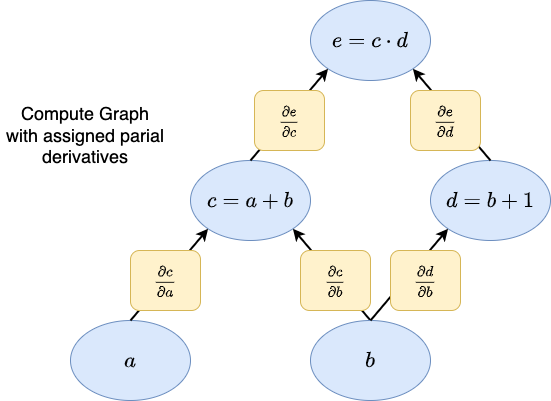

When the gradients are calculuated with respect to outputs, the chain rule can be applied since all gradients are known.

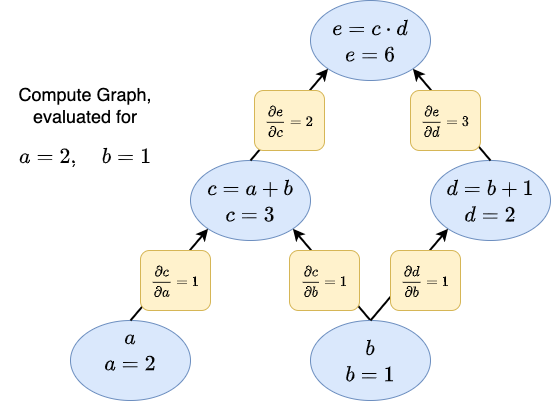

Thanks to: https://maucher.pages.mi.hdm-stuttgart.de/artificial-intelligence/00_Computational_Graphs.html

In [ ]:
import torch

a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

c = a + b     # c = 3
d = b + 1     # d = 2
e = c * d     # e = 6

e.backward()
print(a.grad)
print(b.grad)

b.grad evaluates to 5 because $$\frac{\partial e}{\partial b} =\frac{\partial e}{\partial c} \cdot \frac{\partial c}{\partial b}  + \frac{\partial e}{\partial d} \cdot \frac{\partial d}{\partial b}$$ which is just: $$\frac{\partial e}{\partial b}  = 2 \cdot 1 + 3 \cdot 1$$

## The Multi-Head Self Attention Flow

### Embedding Step

(1). For a picture with resolution 224 x 224, divide into $N = 196$ patches of size $(\frac{224}{16})^2$. 

(2). Each patch has $P^2$ elements ($P=16$ in this case). Including color channels, each patch has $P^2C$ elements and may be represented by a $[P^2C, 1]$ column vector. Since we have $N$ patches, the vector $X$ representing the linear patched image will have dimension $X = [N, P^2C]$. 

(3). Pass $X$ through a dense layer: $$[N, P^2C] \cdot [P^2C, D] = [N,D]$$ to obtain an embedding $E$ with dimensions $[N, D]$. 

(4). Next, append a learnable class embedding to convert $E$ to an $[N+1, D]$ matrix.

(5). Add positional encoding to obtain matrix $Z$ to be passed to Transformer Encoder. $$E + E_{pos} = Z.$$ Note that both the class / positional embeddings are randomly initialized and learnable in training.

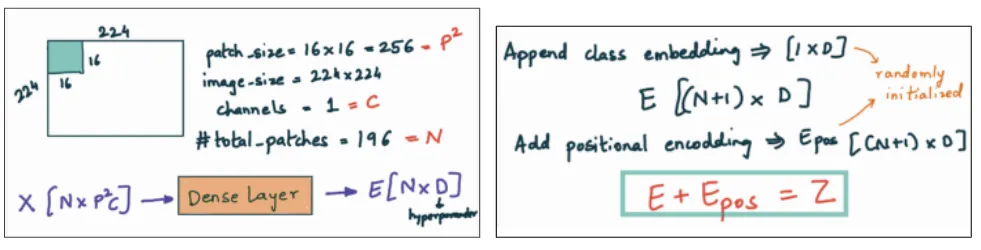

### Transformer Endcoder Architecture

The Transformer Ecoder is made up of multiple encoder blocks. Each encoder block has the following three parts:

Multi-Head Attention (MHA) Module - Feed Forward Neural Network - Normalization Layer

The central component of the MHA module is scaled dot product attention. 

Thanks to: https://medium.com/machine-intelligence-and-deep-learning-lab/vit-vision-transformer-cc56c8071a20